In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re, string
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karmv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\karmv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [49]:
df = pd.read_csv("data2/sentimentdataset.csv")

In [50]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [51]:
df.shape

(732, 15)

In [52]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [53]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [54]:
df.drop(columns='Unnamed: 0.1', inplace=True)

In [55]:
df.rename(columns={'Unnamed: 0':'UsrId'}, inplace= True)

In [56]:
df.columns

Index(['UsrId', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform',
       'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [57]:
df.dtypes

UsrId          int64
Text          object
Sentiment     object
Timestamp     object
User          object
Platform      object
Hashtags      object
Retweets     float64
Likes        float64
Country       object
Year           int64
Month          int64
Day            int64
Hour           int64
dtype: object

In [58]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [59]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

In [60]:
df.head()

,UsrId,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [61]:
float(df.duplicated().sum())

0.0

In [62]:
overview = {
    'rows': df.shape[0],
    'cols': df.shape[1],
    'nulls_per_col': df.isna().sum().to_dict(),
    'sentiment_counts': df['Sentiment'].value_counts(dropna=False).to_dict() if 'Sentiment' in df.columns else {}
}

In [63]:
print('Data loaded and cleaned.')
print('Rows: ' + str(overview['rows']))
print('Cols: ' + str(overview['cols']))
print('Sentiment counts: ' + str(overview['sentiment_counts']))
print('Nulls per col : ' + str(dict(list(overview['nulls_per_col'].items())[:14])))

Data loaded and cleaned.
Rows: 732
Cols: 14
Sentiment counts: {'Positive': 45, 'Joy': 44, 'Excitement': 37, 'Contentment': 19, 'Neutral': 18, 'Gratitude': 18, 'Curiosity': 16, 'Serenity': 15, 'Happy': 14, 'Despair': 11, 'Nostalgia': 11, 'Hopeful': 9, 'Loneliness': 9, 'Awe': 9, 'Grief': 9, 'Sad': 9, 'Embarrassed': 8, 'Confusion': 8, 'Acceptance': 8, 'Euphoria': 7, 'Enthusiasm': 7, 'Pride': 7, 'Elation': 7, 'Determination': 7, 'Melancholy': 6, 'Frustration': 6, 'Indifference': 6, 'Surprise': 6, 'Ambivalence': 6, 'Regret': 6, 'Numbness': 6, 'Playful': 6, 'Bad': 6, 'Inspiration': 6, 'Hate': 6, 'Hope': 5, 'Inspired': 5, 'Betrayal': 5, 'Frustrated': 5, 'Bitterness': 5, 'Empowerment': 5, 'Disgust': 5, 'Happiness': 5, 'Compassion': 4, 'Proud': 4, 'Boredom': 4, 'Reverence': 4, 'Overwhelmed': 4, 'Thrill': 4, 'Enchantment': 4, 'Reflection': 4, 'Compassionate': 4, 'Tenderness': 4, 'Arousal': 4, 'Fulfillment': 4, 'Grateful': 4, 'Admiration': 4, 'Calmness': 4, 'Negative': 4, 'Desolation': 4, 'Antici

In [18]:
print(df.head())

   UsrId                                         Text Sentiment  \
0      0        Enjoying a beautiful day at the park!  Positive   
1      1           Traffic was terrible this morning.  Negative   
2      2          Just finished an amazing workout! 💪  Positive   
3      3  Excited about the upcoming weekend getaway!  Positive   
4      4  Trying out a new recipe for dinner tonight.   Neutral   

            Timestamp        User   Platform            Hashtags  Retweets  \
0 2023-01-15 12:30:00     User123    Twitter       #Nature #Park      15.0   
1 2023-01-15 08:45:00   CommuterX    Twitter   #Traffic #Morning       5.0   
2 2023-01-15 15:45:00  FitnessFan  Instagram   #Fitness #Workout      20.0   
3 2023-01-15 18:20:00  AdventureX   Facebook  #Travel #Adventure       8.0   
4 2023-01-15 19:55:00    ChefCook  Instagram      #Cooking #Food      12.0   

   Likes    Country  Year  Month  Day  Hour  
0   30.0        USA  2023      1   15    12  
1   10.0     Canada  2023      1   1

In [64]:
df.head()

,UsrId,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


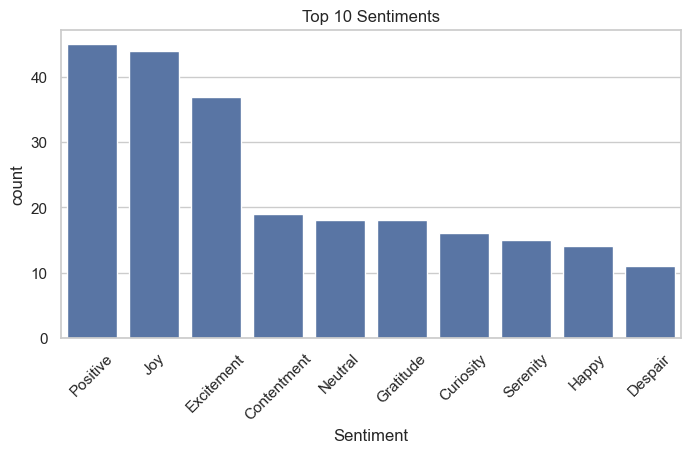

In [65]:
sns.set(style='whitegrid')
top_sentiments = df['Sentiment'].value_counts().nlargest(10).index
plt.figure(figsize=(8,4))
sns.countplot(data=df[df['Sentiment'].isin(top_sentiments)], x='Sentiment',order=top_sentiments)
plt.title("Top 10 Sentiments")
plt.xticks(rotation=45)
plt.show()

In [66]:
df['Platform'].value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

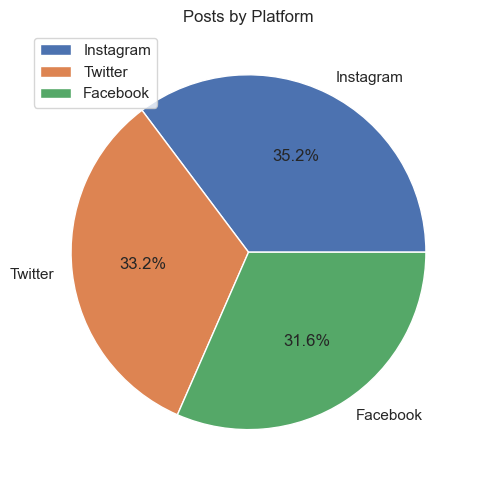

In [67]:
plt.figure(figsize=(5,5))
platform_counts = df['Platform'].value_counts()
plt.pie(platform_counts, labels=platform_counts.index,autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})
plt.title('Posts by Platform')
plt.tight_layout()
plt.legend()
plt.show()

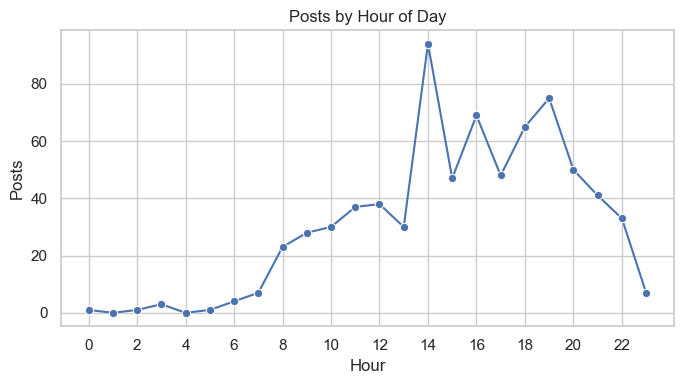

In [68]:
hour_counts = df.groupby('Hour').size().reindex(range(0,24), fill_value=0)
plt.figure(figsize=(7,4))
sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o')
plt.title('Posts by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Posts')
plt.xticks(range(0,24,2))
plt.tight_layout()
plt.show()

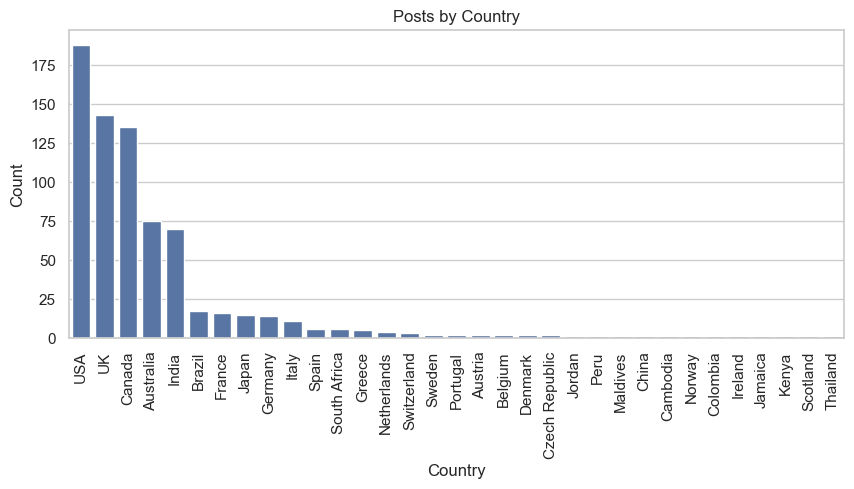

In [69]:
plt.figure(figsize=(10,4))
order_country = df['Country'].value_counts().index
sns.countplot(data=df, x=df['Country'], order=order_country)
plt.title('Posts by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

In [70]:
# mapping months 
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'Mey',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
df['Month'] = df['Month'].map(month_mapping)
df['Month'] = df['Month'].astype('object')

In [71]:
specified_columns = ['Platform','Country','Year','Month','Day']
for col in specified_columns:
    total_unique_values = df[col].nunique()
    print(f"Total unique values for {col}: {total_unique_values}")
    # Get top values with percentage
    top_values = df[col].value_counts(normalize=True) * 100
    print("Top values:")
    for value, perc in top_values.items():
        print(f"  {value}: {perc:.2f}%")
    print("\n" + "=" * 40 + "\n")

Total unique values for Platform: 3
Top values:
  Instagram: 35.25%
  Twitter: 33.20%
  Facebook: 31.56%


Total unique values for Country: 33
Top values:
  USA: 25.68%
  UK: 19.54%
  Canada: 18.44%
  Australia: 10.25%
  India: 9.56%
  Brazil: 2.32%
  France: 2.19%
  Japan: 2.05%
  Germany: 1.91%
  Italy: 1.50%
  Spain: 0.82%
  South Africa: 0.82%
  Greece: 0.68%
  Netherlands: 0.55%
  Switzerland: 0.41%
  Sweden: 0.27%
  Portugal: 0.27%
  Austria: 0.27%
  Belgium: 0.27%
  Denmark: 0.27%
  Czech Republic: 0.27%
  Jordan: 0.14%
  Peru: 0.14%
  Maldives: 0.14%
  China: 0.14%
  Cambodia: 0.14%
  Norway: 0.14%
  Colombia: 0.14%
  Ireland: 0.14%
  Jamaica: 0.14%
  Kenya: 0.14%
  Scotland: 0.14%
  Thailand: 0.14%


Total unique values for Year: 14
Top values:
  2023: 39.48%
  2019: 9.97%
  2020: 9.43%
  2021: 8.61%
  2022: 8.61%
  2018: 7.65%
  2017: 5.87%
  2016: 5.19%
  2015: 2.60%
  2011: 0.55%
  2013: 0.55%
  2012: 0.55%
  2014: 0.55%
  2010: 0.41%


Total unique values for Month: 12
Top

In [79]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
   
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

df["Clean_Text"] = df["Text"].apply(clean)

In [84]:
def get_sentiment(text):
    if pd.isna(text):
        return "Neutral"
    analysis = TextBlob(str(text)).sentiment.polarity
    if analysis > 0:
        return "Positive"
    elif analysis < 0:
        return "Negative"
    else:
        return "Neutral"
df["Sentiment"] = df["Text"].apply(get_sentiment)

print(df[["Clean_Text", "Sentiment"]].head())

                     Clean_Text Sentiment
0         enjoy beauti day park  Positive
1          traffic terribl morn  Negative
2           finish amaz workout  Positive
3   excit upcom weekend getaway  Positive
4  tri new recip dinner tonight  Positive


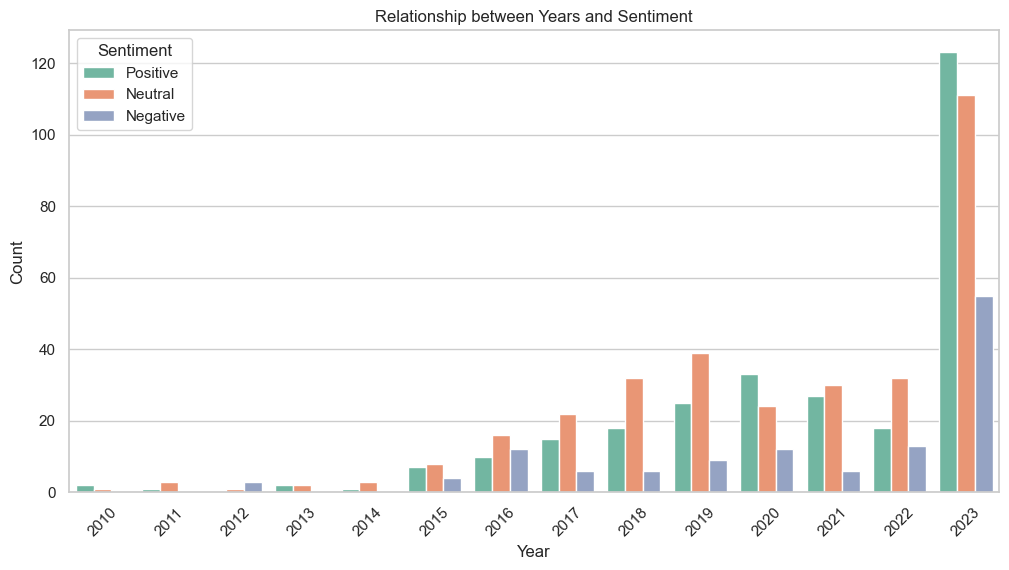

In [85]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=df, palette='Set2')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

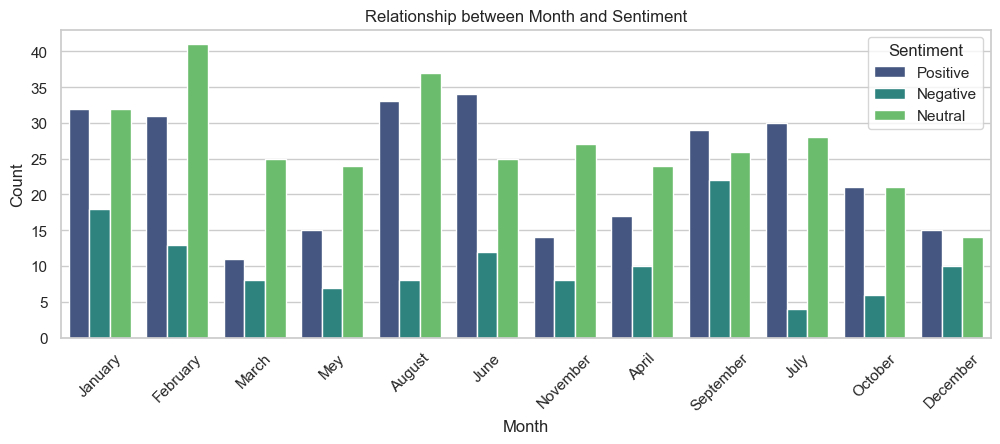

In [86]:
plt.figure(figsize =(12,4))
sns.countplot(x='Month',hue='Sentiment',data= df, palette ='viridis')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

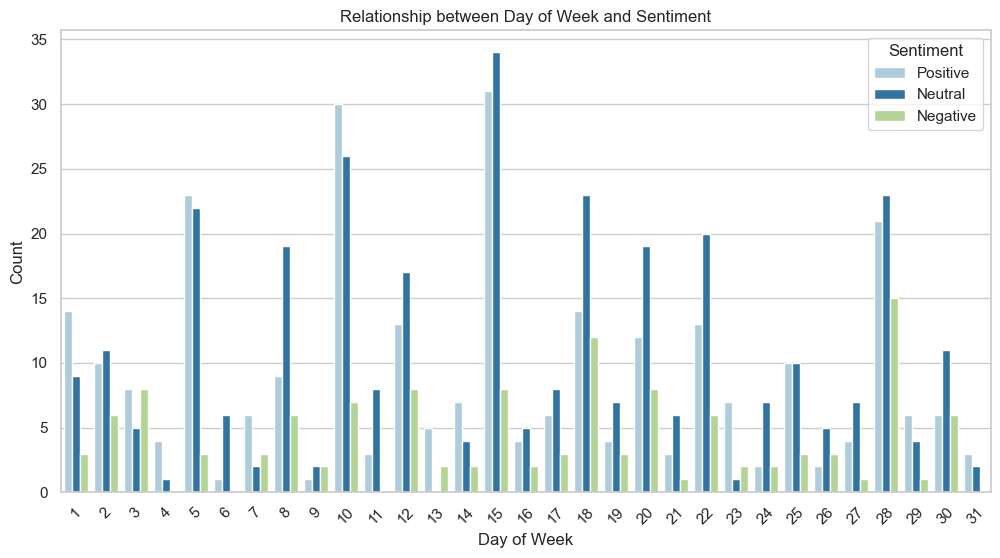

In [87]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day', hue='Sentiment', data=df, palette='Paired')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

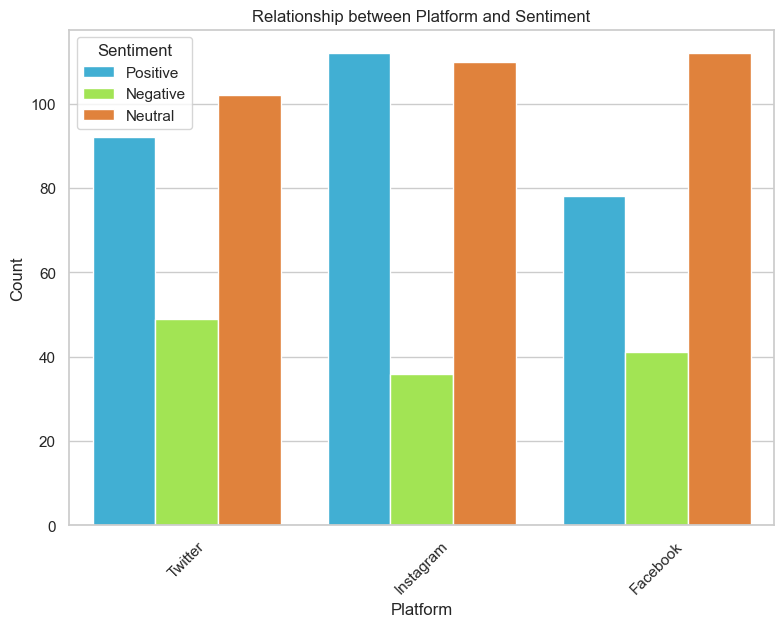

In [88]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df, palette='turbo')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

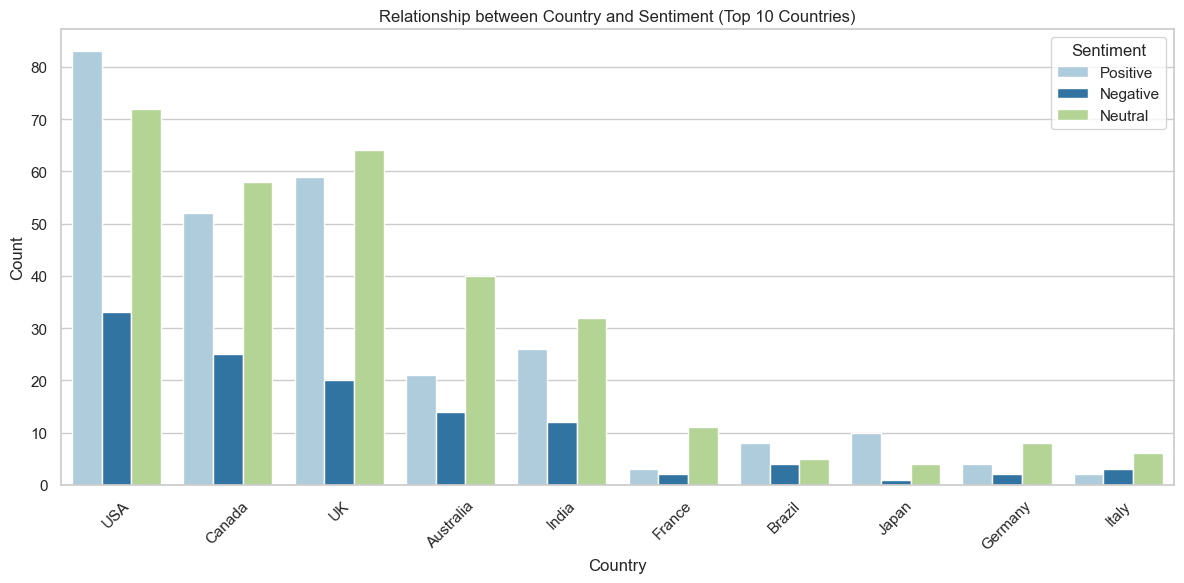

In [89]:
# top 10 countries by frequency
top10_countries = df['Country'].value_counts().head(10).index  
# Filter dataframe
df_top10 = df[df['Country'].isin(top10_countries)]
# Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Sentiment', data=df_top10, palette='Paired')
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [95]:
# Remove stopwords before counting
from collections import Counter
df['temp_list'] = df['Clean_Text'].apply(
    lambda x: [word for word in str(x).split() if word not in stop_words]
)

# Count top words
top_words = Counter([item for sublist in df['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(10), columns=['Common_words', 'count'])

In [103]:
top_words_df

,Common_words,count
0,new,43
1,life,37
2,challeng,34
3,joy,31
4,danc,30
5,day,29
6,feel,29
7,like,28
8,dream,28
9,moment,27


In [100]:
Positive_sent = df[df['Sentiment'] == 'positive']
Negative_sent = df[df['Sentiment'] == 'negative']
Neutral_sent = df[df['Sentiment'] == 'neutral']

In [104]:
print(df['Sentiment'].unique())

['Positive' 'Negative' 'Neutral']


In [105]:
print(df[df['Sentiment'] == 'positive'].shape)

(0, 16)


In [106]:
print(df[['Clean_Text', 'temp_list']].head())

                     Clean_Text                           temp_list
0         enjoy beauti day park          [enjoy, beauti, day, park]
1          traffic terribl morn            [traffic, terribl, morn]
2           finish amaz workout             [finish, amaz, workout]
3   excit upcom weekend getaway    [excit, upcom, weekend, getaway]
4  tri new recip dinner tonight  [tri, new, recip, dinner, tonight]


In [109]:
#positive Common Name

# Get top 10 words for positive sentiment
top = Counter(
    [item for sublist in df[df['Sentiment'].str.lower() == 'positive']['temp_list'] for item in sublist]
)

temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive

,Common_words,count
0,new,40
1,joy,24
2,challeng,22
3,love,17
4,laughter,15
5,moment,15
6,success,15
7,day,12
8,book,12
9,old,11


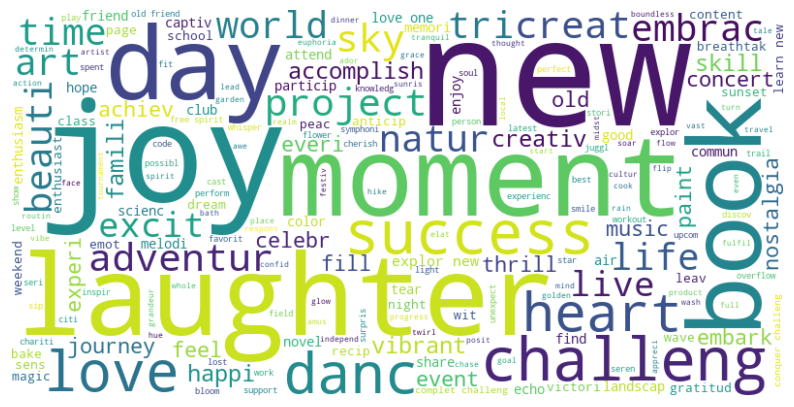

In [113]:
words = ' '.join(
    [item for sublist in df[df['Sentiment'].str.lower() == 'positive']['temp_list'] for item in sublist]
)

if words:  # only if words exist
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No positive words found.")

In [117]:
# neutral common word 
top = Counter([item for sublist in df[df['Sentiment'].str.lower() == 'neutral']['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_neutral

,Common_words,count
0,life,22
1,emot,19
2,dream,16
3,beauti,14
4,night,14
5,danc,14
6,friend,13
7,embrac,13
8,seren,13
9,hope,13


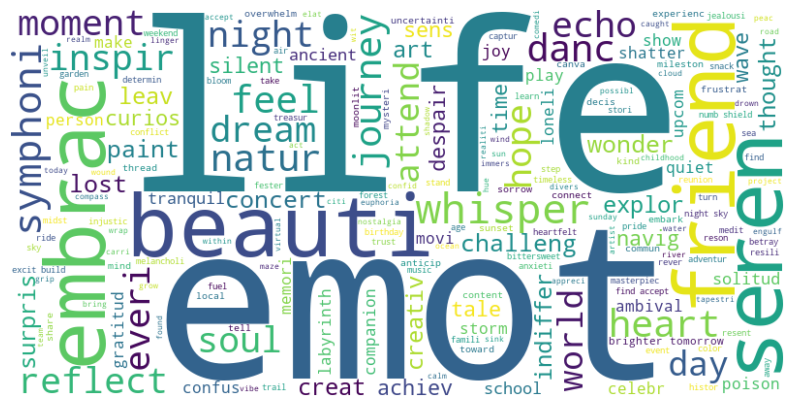

In [121]:
words = ' '.join(
    [item for sublist in df[df['Sentiment'].str.lower() == 'neutral']['temp_list'] for item in sublist]
)

if words:  # only if words exist
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No neutral words found.")

In [120]:
#top 10 Negative Words
top = Counter([item for sublist in df[df['Sentiment'].str.lower() == 'negative']['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_negative

,Common_words,count
0,feel,11
1,like,10
2,past,9
3,echo,9
4,day,8
5,disappoint,8
6,bitter,7
7,grief,7
8,dream,7
9,shatter,7


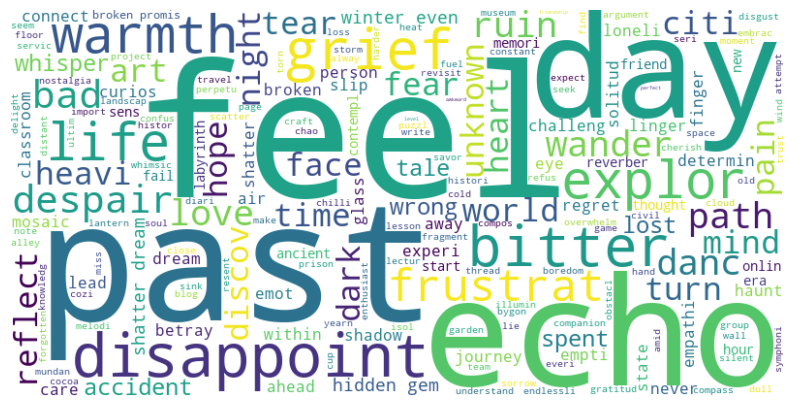

In [126]:
words = ' '.join(
    [item for sublist in df[df['Sentiment'].str.lower() == 'negative']['temp_list'] for item in sublist]
)

if words:  # only if words exist
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No negative words found.")

In [131]:
# Suppose 'clean_text_function' is the function you used to clean your text
# Example: df['clean_Text'] = df['Text'].apply(clean_text_function)



# Print updated table
print(df.head())


   UsrId Sentiment           Timestamp        User   Platform  \
0      0  Positive 2023-01-15 12:30:00     User123    Twitter   
1      1  Negative 2023-01-15 08:45:00   CommuterX    Twitter   
2      2  Positive 2023-01-15 15:45:00  FitnessFan  Instagram   
3      3  Positive 2023-01-15 18:20:00  AdventureX   Facebook   
4      4  Positive 2023-01-15 19:55:00    ChefCook  Instagram   

             Hashtags  Retweets  Likes    Country  Year    Month  Day  Hour  \
0       #Nature #Park      15.0   30.0        USA  2023  January   15    12   
1   #Traffic #Morning       5.0   10.0     Canada  2023  January   15     8   
2   #Fitness #Workout      20.0   40.0        USA  2023  January   15    15   
3  #Travel #Adventure       8.0   15.0         UK  2023  January   15    18   
4      #Cooking #Food      12.0   25.0  Australia  2023  January   15    19   

                     Clean_Text                           temp_list  \
0         enjoy beauti day park          [enjoy, beauti, day, p

In [132]:
df.to_csv("Updated_cleaned.csv", index=False, encoding="utf-8")